In [307]:
# Import libraries for numerical operations, data manipulation, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [111]:
# Load an Excel file into a DataFrame
df = pd.read_excel("C:\\Users\\ADMIN\\Downloads\\Datasets\\Coffee Shop Sales.xlsx")


In [115]:
# Display summary information about the DataFrame, including the number of non-null entries and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [311]:
# Display the first few rows of the DataFrame to get a preview of the data
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,date_time,day_of_week,month,hour
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11,Sunday,2023-01,7
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56,Sunday,2023-01,7
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04,Sunday,2023-01,7
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24,Sunday,2023-01,7
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41,Sunday,2023-01,7


In [119]:
# Convert the 'transaction_time' column to string type to ensure consistent format
df['transaction_time'] = df['transaction_time'].astype(str)

# Convert the 'transaction_time' column from string to timedelta type for time-based calculations
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])


In [121]:
# Create a new column 'total_sales' by multiplying 'unit_price' with 'transaction_qty'
df = df.assign(total_sales=df['unit_price'] * df['transaction_qty'])

# Create a new column 'date_time' by combining 'transaction_date' with 'transaction_time'
df = df.assign(date_time=df['transaction_date'] + df['transaction_time'])


In [123]:
# Display the first few rows of the DataFrame to get a view of the newly added column
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,date_time
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [125]:
# Generate descriptive statistics for numerical columns, including count, mean, standard deviation, min, max, and percentiles
df.describe()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,total_sales,date_time
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [129]:
# Group the DataFrame by the 'store_location' column and aggregate the data:
# - Compute the total sales for each store location using the sum of the 'total_sales' column.
# - Count the number of transactions for each store location using the count of the 'transaction_id' column.
# The result is stored in the 'df_location' DataFrame, which contains the aggregated totals and transaction counts for each store location.

df_location = df.groupby('store_location').agg({
    'total_sales': 'sum',           # Calculate the total sales for each location
    'transaction_id': 'count'       # Count the number of transactions for each location
})
print(df_location)


                 total_sales  transaction_id
store_location                              
Astoria            232243.91           50599
Hell's Kitchen     236511.17           50735
Lower Manhattan    230057.25           47782


In [131]:
# Group the DataFrame by 'transaction_date' and 'store_location', then sum the 'total_sales' for each group.
# The result is transformed with 'unstack()' to pivot 'store_location' columns into separate columns,
# creating a DataFrame where each row represents a date and each column represents a store location's total sales.
# Print the resulting DataFrame showing daily sales by store location.

daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['total_sales'].sum().unstack()
print(daily_sales_by_location)


store_location    Astoria  Hell's Kitchen  Lower Manhattan
transaction_date                                          
2023-01-01         868.40          851.45           788.35
2023-01-02         925.50          828.80           649.05
2023-01-03         902.75          906.25           756.00
2023-01-04         808.25          781.65           630.20
2023-01-05         903.05          714.90           800.90
...                   ...             ...              ...
2023-06-26        1975.10         1746.10          2154.70
2023-06-27        1861.55         1676.70          2437.40
2023-06-28        1758.10         1445.85          1524.95
2023-06-29        1852.75         1298.55          1299.45
2023-06-30        1807.65         1904.93          1768.74

[181 rows x 3 columns]


In [135]:
# Create a pivot table to summarize total sales by date and store location:
# - Rows represent 'transaction_date'.
# - Columns represent 'store_location'.
# - Values are the sum of 'total_sales' for each date and location.
# - Missing values are filled with 0 (optional).
# This approach is an alternative to using '.unstack()' after a groupby operation,
# providing a more direct way to achieve a similar result with built-in aggregation.

daily_sales_by_location = df.pivot_table(
    index='transaction_date',      # Rows for the pivot table
    columns='store_location',      # Columns for the pivot table
    values='total_sales',          # Data to aggregate
    aggfunc='sum',                 # Aggregation function (sum of sales)
    fill_value=0                   # Optional: fill missing values with 0
)
print(daily_sales_by_location)


store_location    Astoria  Hell's Kitchen  Lower Manhattan
transaction_date                                          
2023-01-01         868.40          851.45           788.35
2023-01-02         925.50          828.80           649.05
2023-01-03         902.75          906.25           756.00
2023-01-04         808.25          781.65           630.20
2023-01-05         903.05          714.90           800.90
...                   ...             ...              ...
2023-06-26        1975.10         1746.10          2154.70
2023-06-27        1861.55         1676.70          2437.40
2023-06-28        1758.10         1445.85          1524.95
2023-06-29        1852.75         1298.55          1299.45
2023-06-30        1807.65         1904.93          1768.74

[181 rows x 3 columns]


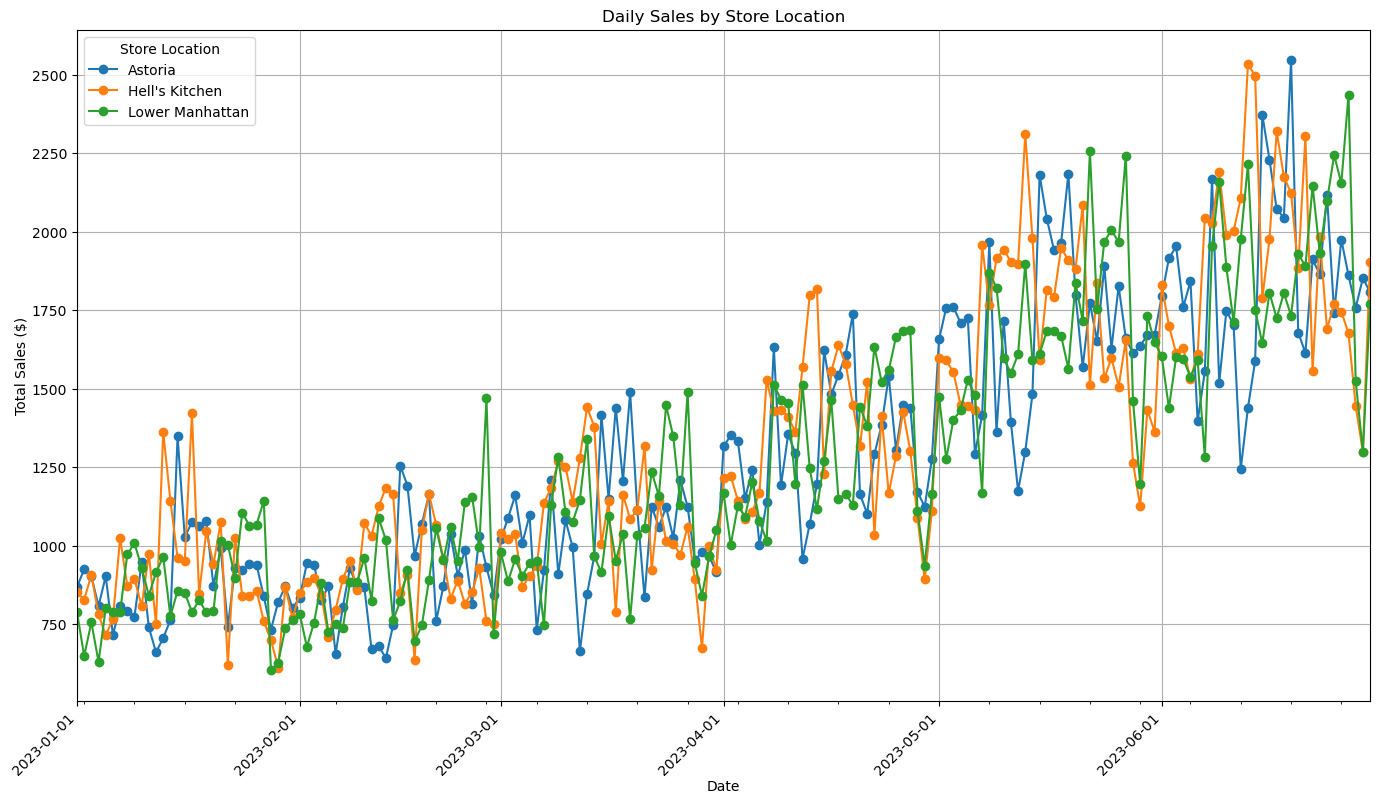

In [313]:
# Plot the daily sales data with separate lines for each store location
# - figsize=(14,8): Set the size of the plot.
# - xlabel and ylabel: Label the x-axis as 'Date' and y-axis as 'Total Sales ($)', with padding for clarity.
# - legend: Display a legend with a title 'Store Location' to differentiate the lines for each store.
# - grid: Enable grid lines for better readability of the plot.
# - title: Set the plot title to 'Daily Sales by Store Location'.
# - tight_layout: Adjust plot layout to fit labels and titles neatly.
# - xticks(rotation=45): Rotate x-axis labels by 45 degrees for better visibility.
# - Data markers: Add markers to each line for better visibility of individual data points.
# - Date formatting: Use 'mdates' to format x-axis dates for clarity.
# - Save plot: Optionally save the plot as a PNG file.

ax = daily_sales_by_location.plot(figsize=(14,8), marker='o')  # Add markers for data points
plt.xlabel('Date', labelpad=2)
plt.ylabel('Total Sales ($)', labelpad=2)
plt.legend(title='Store Location')
plt.grid(True)
plt.title('Daily Sales by Store Location')

# Format x-axis with dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format the date labels

plt.tight_layout()
plt.xticks(rotation=45)

# Optionally save the plot to a file
#plt.savefig('daily_sales_by_location.png', dpi=300)

plt.show()


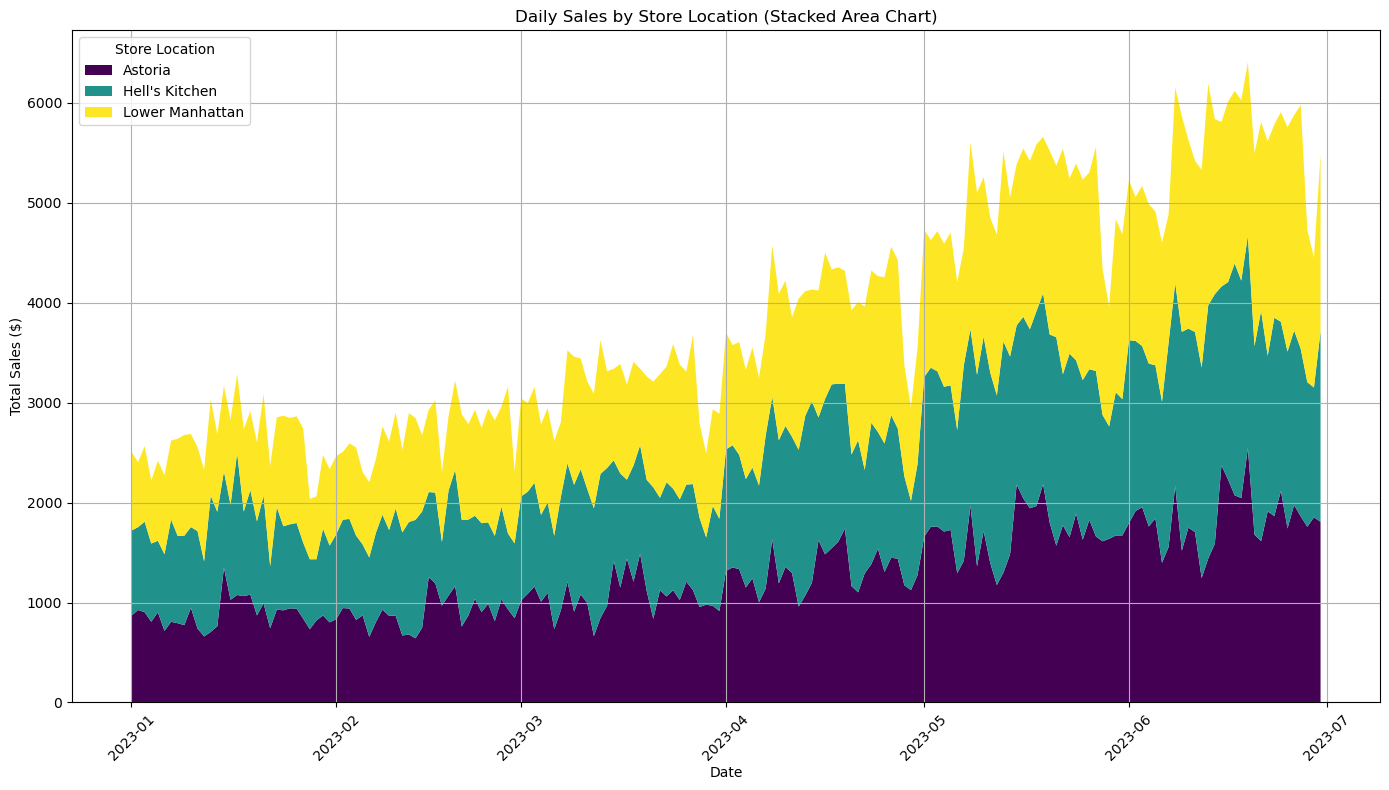

In [318]:
# Set a colormap for the stacked areas to ensure distinct colors for each store location
colors = plt.cm.viridis(np.linspace(0, 1, len(daily_sales_by_location.columns)))

# Create a stacked area chart to visualize daily sales by store location
# - figsize=(14,8): Set the size of the figure.
# - stackplot: Plot a stacked area chart where the x-axis represents dates and the y-axis represents total sales.
#   - daily_sales_by_location.index: Use the dates for the x-axis.
#   - daily_sales_by_location.T: Transpose the DataFrame to use store locations as different layers in the stacked plot.
#   - labels=daily_sales_by_location.columns: Set labels for the legend to differentiate store locations.
#   - colors: Use a colormap to assign distinct colors to each area.
# - xlabel and ylabel: Label the x-axis as 'Date' and y-axis as 'Total Sales ($)', with padding for clarity.
# - legend: Display a legend with the title 'Store Location' in the upper left corner.
# - grid: Enable grid lines for better readability of the plot.
# - title: Set the plot title to 'Daily Sales by Store Location (Stacked Area Chart)'.
# - xticks(rotation=45): Rotate x-axis labels by 45 degrees for better visibility.
# - tight_layout: Adjust plot layout to fit labels and titles neatly.
# - show: Display the plot.

plt.figure(figsize=(14,8))
plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels=daily_sales_by_location.columns, colors=colors)
plt.xlabel('Date', labelpad=2)
plt.ylabel('Total Sales ($)', labelpad=2)
plt.legend(title='Store Location', loc='upper left')
plt.grid(True)
plt.title('Daily Sales by Store Location (Stacked Area Chart)')
plt.xticks(rotation=45)
plt.tight_layout()

# Optionally, you can save the plot to a file for further use
#plt.savefig('daily_sales_by_location_stacked_area_chart.png', dpi=300)

plt.show()


In [274]:
# Calculate total sales for each day:
# - groupby('transaction_date'): Group data by each unique transaction date.
# - sum(): Aggregate total sales for each date.
# - reset_index(): Convert the result back to a DataFrame with 'transaction_date' as a column.
# This DataFrame shows total sales for each day, useful for analyzing daily sales trends.

daily_sales = df.groupby('transaction_date')['total_sales'].sum().reset_index()
daily_sales

# Add a new column to the DataFrame representing the day of the week:
# - dt.day_name(): Extract the name of the day from 'date_time' (e.g., 'Monday', 'Tuesday').
# This column will help in grouping and analyzing sales data by days of the week.

df['day_of_week'] = df['date_time'].dt.day_name()

# Calculate total sales for each day of the week:
# - groupby('day_of_week'): Group data by 'day_of_week' to aggregate sales.
# - sum(): Sum total sales for each day of the week.
# - reindex(): Ensure the days of the week are in the correct order starting from Monday.
# - reset_index(): Convert the result back to a DataFrame with 'day_of_week' as a column.
# This DataFrame helps in analyzing weekly sales patterns, showing how sales vary by each day of the week.

weekly_sales = df.groupby('day_of_week')['total_sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
weekly_sales

# Add a new column to the DataFrame representing the month and year:
# - dt.to_period('M'): Convert 'date_time' to a monthly period (e.g., '2024-08').
# This column will be used to group and analyze sales data by month.

df['month'] = df['date_time'].dt.to_period('M')

# Calculate total sales for each month:
# - groupby('month'): Group data by the 'month' period.
# - sum(): Aggregate total sales for each month.
# - reset_index(): Convert the result back to a DataFrame with 'month' as a column.
# This DataFrame provides a view of total sales trends over time, allowing for monthly sales analysis.

monthly_sales = df.groupby('month')['total_sales'].sum().reset_index()

# Print sales data at daily, weekly, and monthly intervals.
print(daily_sales, weekly_sales, monthly_sales)


    transaction_date  total_sales
0         2023-01-01      2508.20
1         2023-01-02      2403.35
2         2023-01-03      2565.00
3         2023-01-04      2220.10
4         2023-01-05      2418.85
..               ...          ...
176       2023-06-26      5875.90
177       2023-06-27      5975.65
178       2023-06-28      4728.90
179       2023-06-29      4450.75
180       2023-06-30      5481.32

[181 rows x 2 columns]   day_of_week  total_sales
0      Monday    101677.28
1     Tuesday     99455.94
2   Wednesday    100313.54
3    Thursday    100767.78
4      Friday    101373.00
5    Saturday     96894.48
6      Sunday     98330.31      month  total_sales
0  2023-01     81677.74
1  2023-02     76145.19
2  2023-03     98834.68
3  2023-04    118941.08
4  2023-05    156727.76
5  2023-06    166485.88


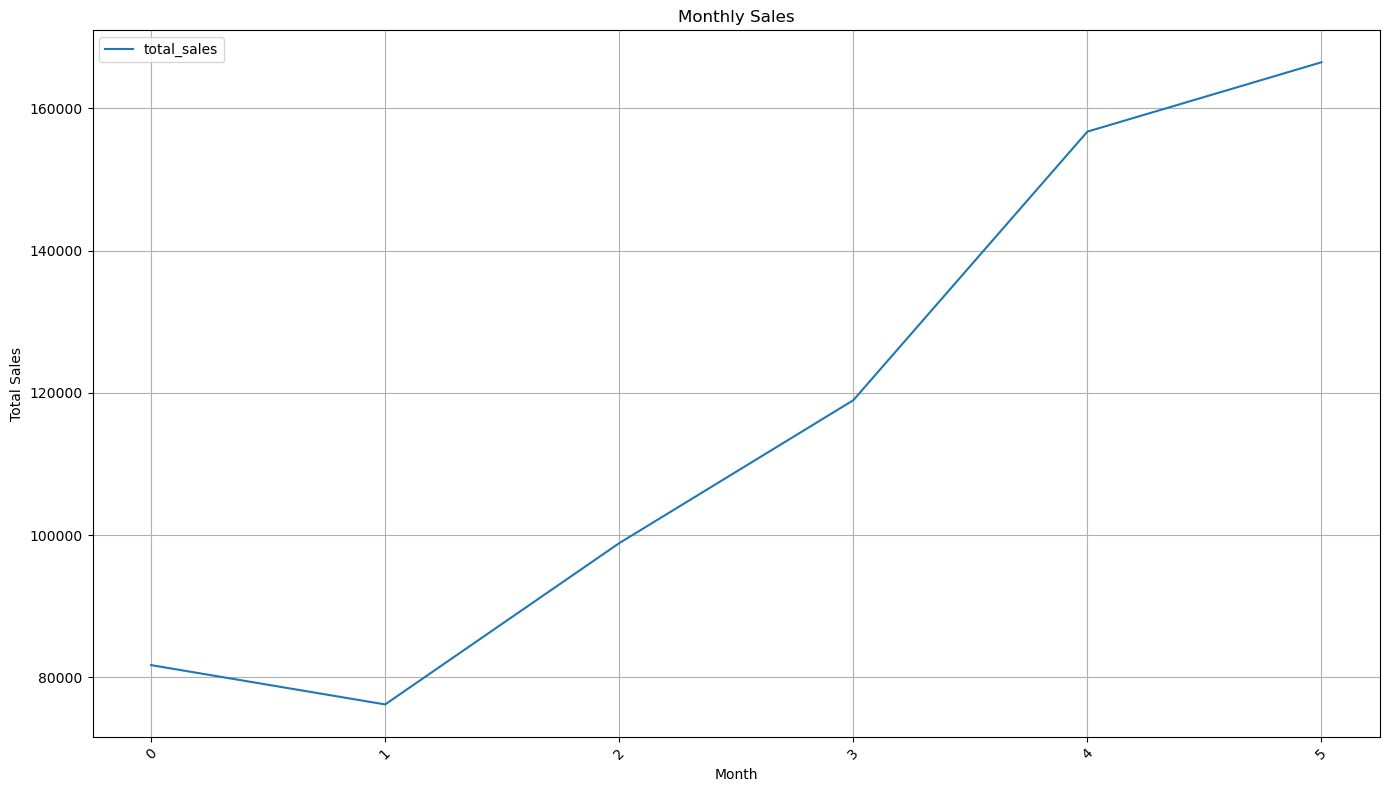

In [268]:
# Plotting the monthly sales data with a figure size of 14x8 inches.
monthly_sales.plot(figsize=(14,8))

# Setting the label for the x-axis to 'Month'.
plt.xlabel('Month')

# Setting the label for the y-axis to 'Total Sales'.
plt.ylabel('Total Sales')

# Giving the plot a title that clearly indicates what the data represents.
plt.title('Monthly Sales')

# Ensuring that everything fits within the plot area, avoiding overlap or cutoff.
plt.tight_layout()

# Rotating the x-axis labels by 45 degrees for better readability, especially if there are many months.
plt.xticks(rotation=45)

# Adding grid lines to the plot for easier interpretation of the data.
plt.grid(True)

# Finally, displaying the plot with all the customized settings applied.
plt.show()


In [282]:
# Group sales data by day of the week and store location, then sum the total sales.
weekly_sales = df.groupby(['day_of_week', 'store_location'])['total_sales'].sum().unstack()

# Reorder the days of the week to ensure they appear in the correct sequence.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)

# Print the weekly sales data to verify the reordering and aggregation.
print(weekly_sales)


store_location   Astoria  Hell's Kitchen  Lower Manhattan
day_of_week                                              
Monday          33928.29        33389.51         34359.48
Tuesday         31816.76        34846.47         32792.71
Wednesday       34244.63        33779.09         32289.82
Thursday        34140.37        33468.06         33159.35
Friday          33472.75        34743.18         33157.07
Saturday        31845.93        32599.23         32449.32
Sunday          32795.18        33685.63         31849.50


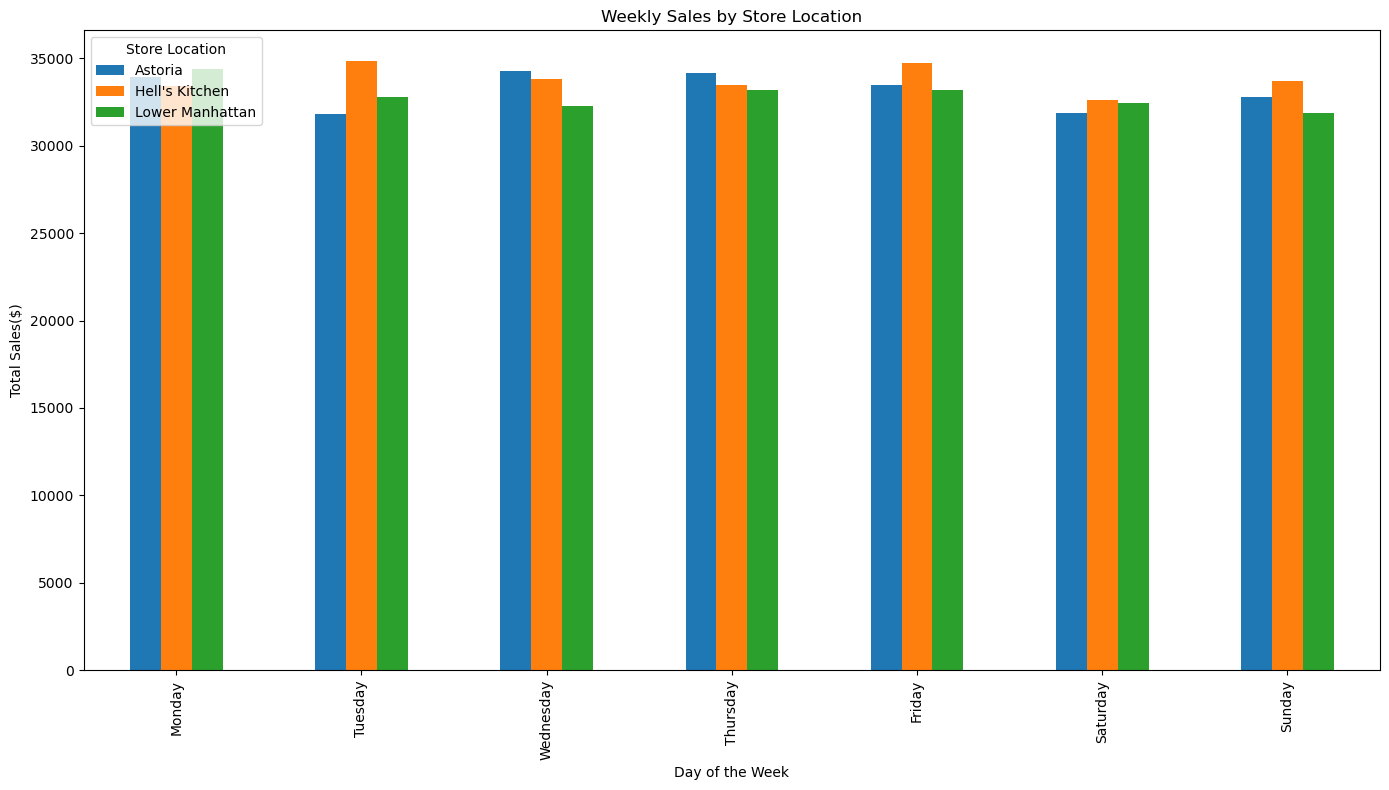

In [284]:
# Plot weekly sales for specified store locations as a bar chart.
weekly_sales[["Astoria", "Hell's Kitchen", "Lower Manhattan"]].plot(kind='bar', figsize=(14,8))

# Label the x-axis as 'Day of the Week'.
plt.xlabel('Day of the Week')

# Label the y-axis as 'Total Sales($)'.
plt.ylabel('Total Sales($)')

# Set the title of the plot to 'Weekly Sales by Store Location'.
plt.title('Weekly Sales by Store Location')

# Add a legend with the title 'Store Location' at the upper left.
plt.legend(title='Store Location', loc='upper left')

# Ensure the layout fits well.
plt.tight_layout()

# Display the plot.
plt.show()


In [286]:
# Group data by product category, aggregating total sales (sum) and transaction count.
df_category = df.groupby('product_category').agg({
    'total_sales': 'sum',
    'transaction_id': 'count'
}).sort_values(by='total_sales', ascending=False)

# Print the aggregated data, sorted by total sales in descending order.
print(df_category)


                    total_sales  transaction_id
product_category                               
Coffee                269952.45           58416
Tea                   196405.95           45449
Bakery                 82315.64           22796
Drinking Chocolate     72416.00           11468
Coffee beans           40085.25            1753
Branded                13607.00             747
Loose Tea              11213.60            1210
Flavours                8408.80            6790
Packaged Chocolate      4407.64             487


In [288]:
# Extract the hour from the 'date_time' column and create a new 'hour' column.
df['hour'] = df['date_time'].dt.hour

# Group data by hour and product category, then sum the total sales for each.
# Unstack the product categories to create a pivot table with hours as rows and categories as columns.
hourly_sales_per_product = df.groupby(['hour', 'product_category'])['total_sales'].sum().unstack()


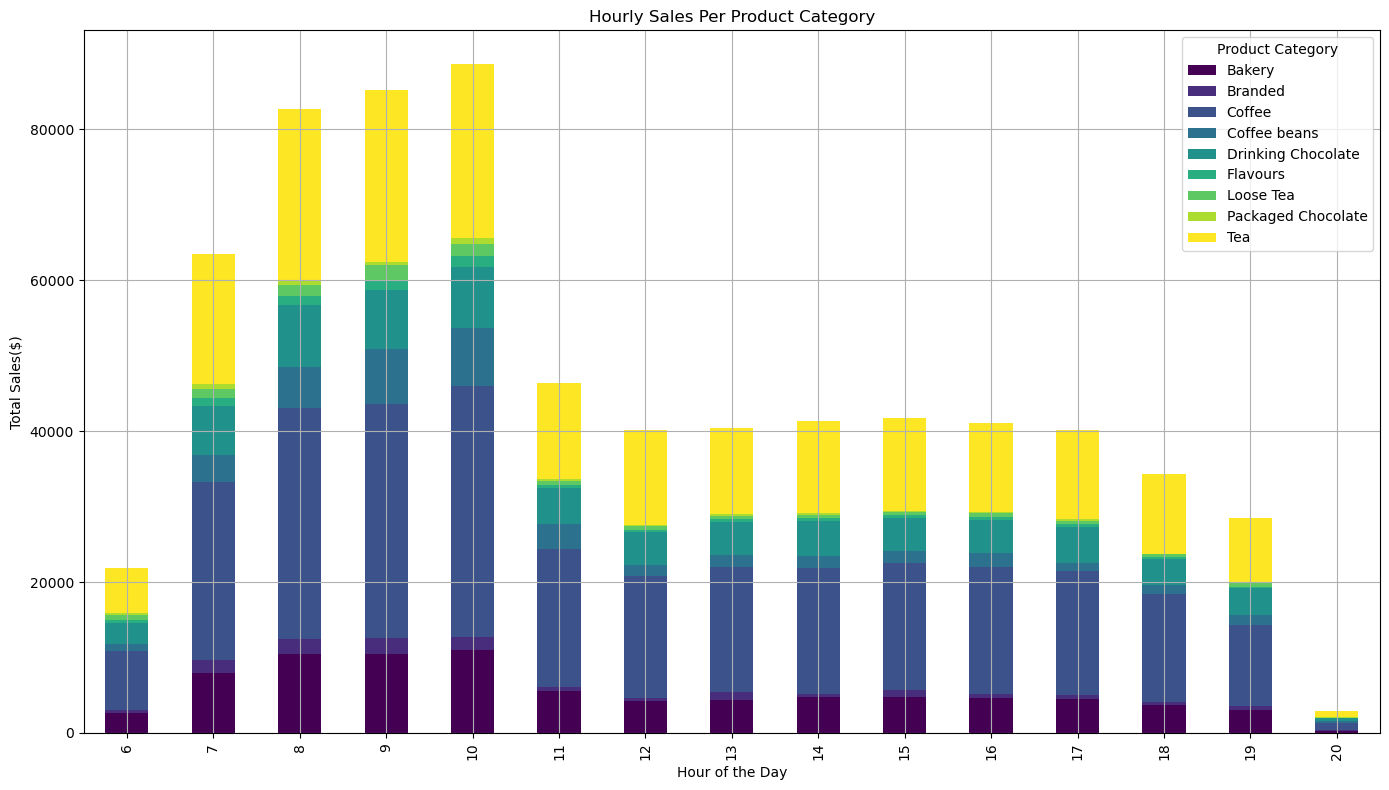

In [290]:
# Plot hourly sales per product category as a stacked bar chart with a 'viridis' colormap.
hourly_sales_per_product.plot(kind='bar', figsize=(14,8), stacked=True, colormap='viridis')

# Label the x-axis as 'Hour of the Day'.
plt.xlabel('Hour of the Day')

# Label the y-axis as 'Total Sales($)'.
plt.ylabel('Total Sales($)')

# Set the title of the plot to 'Hourly Sales Per Product Category'.
plt.title('Hourly Sales Per Product Category')

# Add a legend with the title 'Product Category' at the upper right.
plt.legend(title='Product Category', loc='upper right')

# Ensure the layout fits well and add grid lines for better readability.
plt.tight_layout()
plt.grid(True)

# Display the plot.
plt.show()


In [292]:
# Calculate the average sales per transaction for each product category.
df_category['avg_sales'] = df_category['total_sales'] / df_category['transaction_id']

# Print the updated DataFrame with the new 'avg_sales' column.
print(df_category)


                    total_sales  transaction_id  avg_sales
product_category                                          
Coffee                269952.45           58416   4.621207
Tea                   196405.95           45449   4.321458
Bakery                 82315.64           22796   3.610969
Drinking Chocolate     72416.00           11468   6.314615
Coffee beans           40085.25            1753  22.866657
Branded                13607.00             747  18.215529
Loose Tea              11213.60            1210   9.267438
Flavours                8408.80            6790   1.238409
Packaged Chocolate      4407.64             487   9.050595


In [294]:
# Group the DataFrame by 'product_type'
# Aggregate total sales by summing 'total_sales' and calculate the mean of 'unit_price' for each product type
sales_by_product = df.groupby('product_type').agg({
    'total_sales': 'sum',  # Summarize total sales for each product type to understand overall revenue
    'unit_price': 'mean'  # Calculate average unit price for each product type to analyze pricing
}).sort_values(by='total_sales', ascending=False)  # Sort the result by total sales in descending order to highlight top-selling products

print(sales_by_product)  # Display the aggregated and sorted results


                       total_sales  unit_price
product_type                                  
Barista Espresso          91406.20    3.655200
Brewed Chai tea           77081.95    2.936993
Hot chocolate             72416.00    4.148827
Gourmet brewed coffee     70034.60    2.696641
Brewed Black tea          47932.00    2.744670
Brewed herbal tea         47539.50    2.744731
Premium brewed coffee     38781.15    3.122452
Organic brewed coffee     37746.50    2.898021
Scone                     36866.12    3.534638
Drip coffee               31984.00    2.484959
Pastry                    25655.99    3.685979
Brewed Green tea          23852.50    2.742462
Biscotti                  19793.53    3.419503
Premium Beans             14583.50   34.028274
Organic Beans              8509.50   20.287952
Housewares                 7444.00   13.448669
Gourmet Beans              6798.00   18.573770
Clothing                   6163.00   27.886878
Regular syrup              6084.80    0.800000
Espresso Bean

In [298]:
# Group the DataFrame by both 'product_category' and 'product_type'
# Calculate the sum of 'total_sales' for each combination of category and type
product_sales_df = df.groupby(['product_category', 'product_type'])['total_sales'].sum().reset_index()

# Display the DataFrame with aggregated sales data
print(product_sales_df)


      product_category           product_type  total_sales
0               Bakery               Biscotti     19793.53
1               Bakery                 Pastry     25655.99
2               Bakery                  Scone     36866.12
3              Branded               Clothing      6163.00
4              Branded             Housewares      7444.00
5               Coffee       Barista Espresso     91406.20
6               Coffee            Drip coffee     31984.00
7               Coffee  Gourmet brewed coffee     70034.60
8               Coffee  Organic brewed coffee     37746.50
9               Coffee  Premium brewed coffee     38781.15
10        Coffee beans         Espresso Beans      5560.25
11        Coffee beans          Gourmet Beans      6798.00
12        Coffee beans            Green beans      1340.00
13        Coffee beans      House blend Beans      3294.00
14        Coffee beans          Organic Beans      8509.50
15        Coffee beans          Premium Beans     14583.

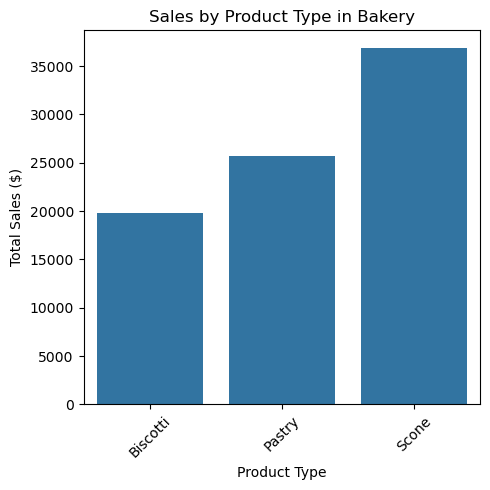

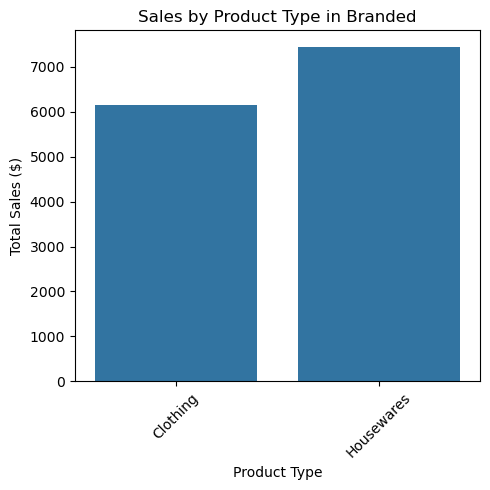

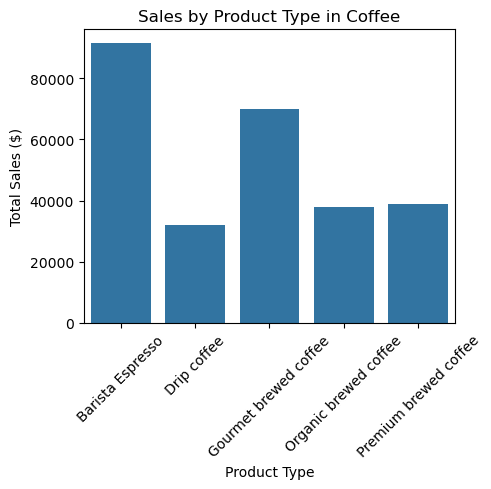

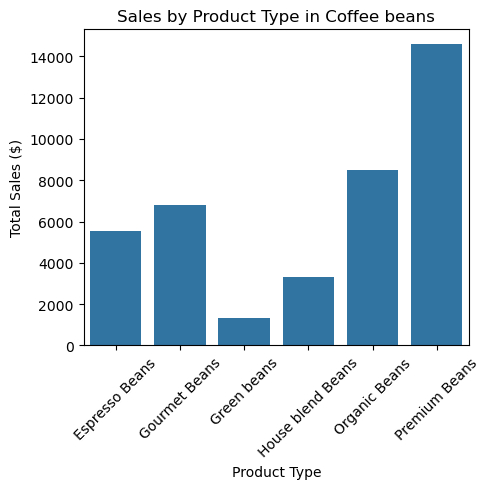

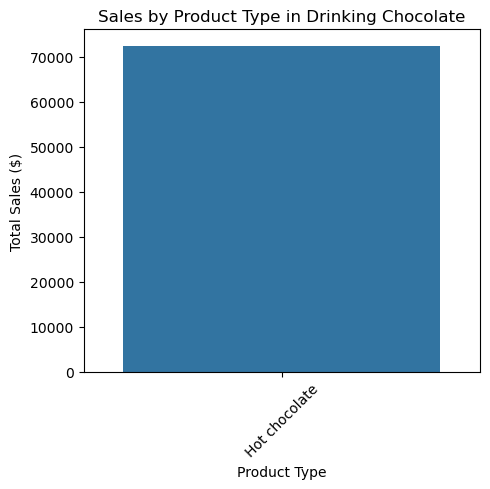

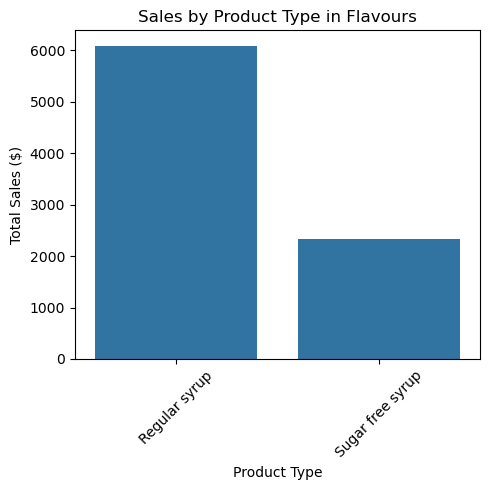

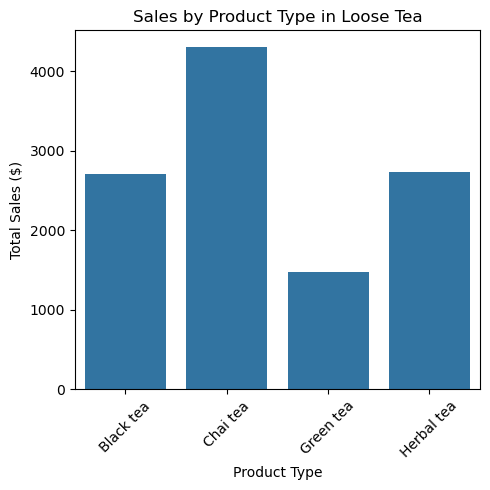

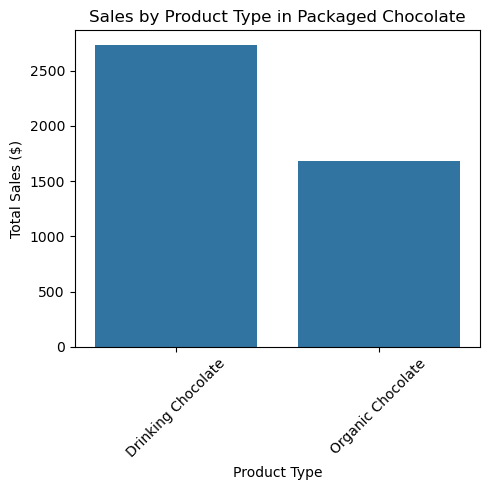

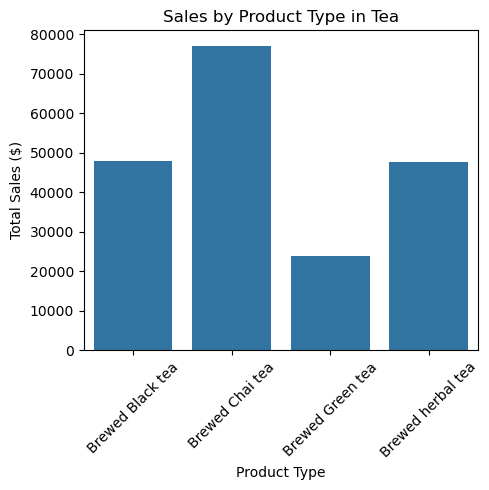

In [300]:
# Get unique product categories from the DataFrame
categories = product_sales_df['product_category'].unique()

# Loop through each category to create individual bar plots
for category in categories:
    plt.figure(figsize=(5, 5))  # Set the size of the plot
    
    # Filter data for the current category
    category_data = product_sales_df[product_sales_df['product_category'] == category]
    
    # Create a bar plot showing total sales for each product type in the current category
    sns.barplot(data=category_data, x='product_type', y='total_sales')
    
    # Set plot title and labels
    plt.title(f'Sales by Product Type in {category}')
    plt.xlabel('Product Type')
    plt.ylabel('Total Sales ($)')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    
    # Display the plot
    plt.show()


In [264]:
# Group the DataFrame by 'store_location' and 'hour'
# Calculate the sum of 'total_sales' for each combination of store location and hour
hourly_sales_by_location = df.groupby(['store_location', 'hour'])['total_sales'].sum().reset_index()

# Display the DataFrame with aggregated hourly sales data for each location
hourly_sales_by_location


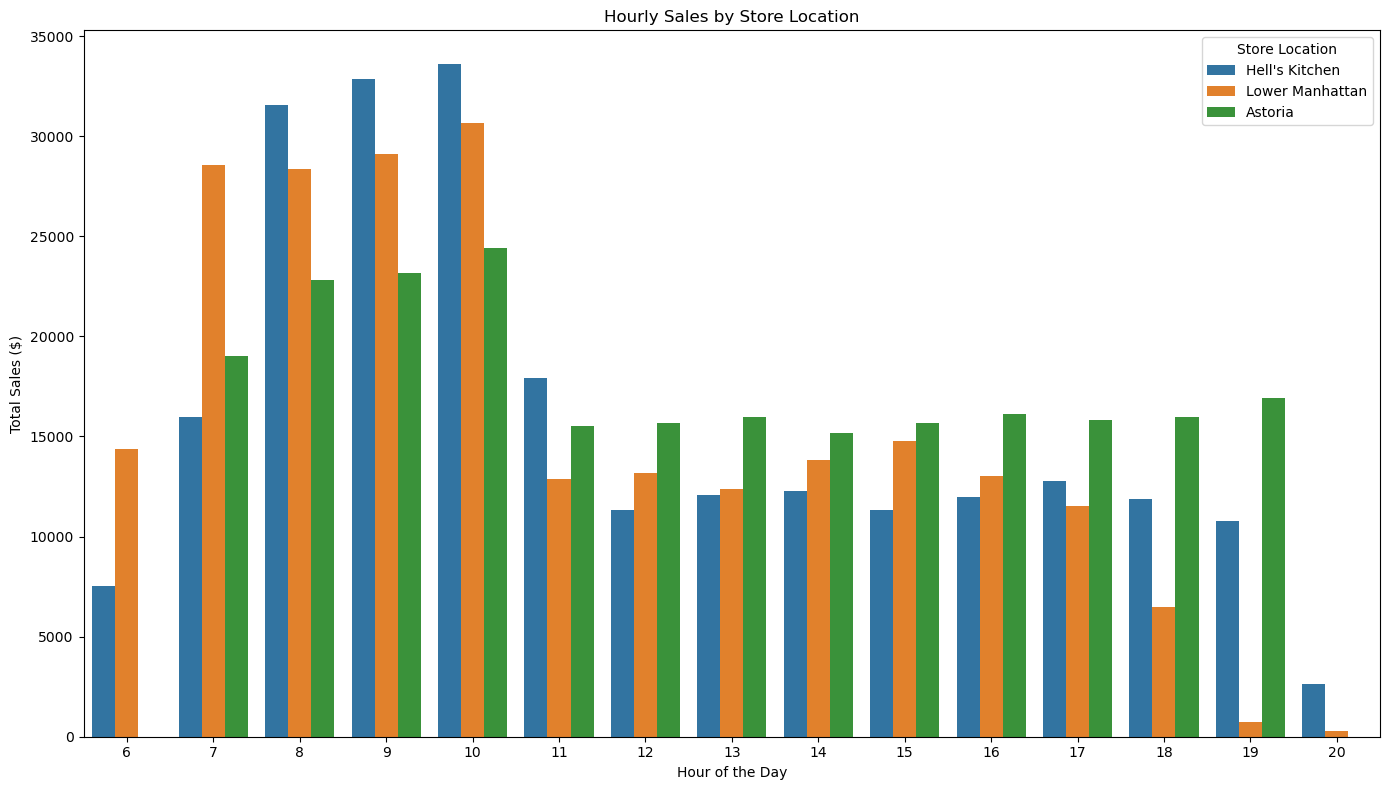

In [305]:
# Create a new figure with a specified size
plt.figure(figsize=(14, 8))

# Create a bar plot to visualize total sales by hour, with different colors for each store location
sns.barplot(data=hourly_sales_by_location, x='hour', y='total_sales', hue='store_location')

# Set the title of the plot
plt.title('Hourly Sales by Store Location')

# Set the label for the x-axis
plt.xlabel('Hour of the Day')

# Set the label for the y-axis
plt.ylabel('Total Sales ($)')

# Add a legend to distinguish different store locations, placed in the upper right
plt.legend(title='Store Location', loc='upper right')

# Adjust the layout to ensure that all labels and titles fit well
plt.tight_layout()

# Display the plot
plt.show()
